In [1]:
import pickle as pkl
import numpy as np
import pandas as pd

In [110]:
N_order_accept_ls = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,65,70,75,80,85,90,95,100,105,110,115]
N_exper_ls = [100]*len(N_order_accept_ls)

In [111]:
accept_ratio_ls = []
total_cost_ls = []
fixed_cost_ls = []
part_cost_ls = []
fuel_cost_ls = []
dist_ls = []

for i in range(len(N_order_accept_ls)):
    N_order_accept = N_order_accept_ls[i]
    N_exper = N_exper_ls[i]
    with open('result/current_strategy cost_result N_order_accepted:{} N_exper:{}.pkl'.format(N_order_accept, N_exper) ,'rb') as file:
        result_summary = pkl.load(file)


    one_cost_df = pd.DataFrame(result_summary['cost'])
    one_dist_ls = result_summary['dist']
    one_accept_num_df = pd.DataFrame(result_summary['accept_num'])

    total_cost_ls.append(one_cost_df['total'].values)
    fixed_cost_ls.append(one_cost_df['fixed'].values)
    fuel_cost_ls.append(one_cost_df['fuel'].values)
    part_cost_ls.append(one_cost_df['part'].values)

    dist_ls.append(np.array(one_dist_ls))
    exper_total_order = np.sum(one_accept_num_df['total_order'])
    exper_accepted_order = np.sum(one_accept_num_df['accepted_order'])
    accept_ratio = exper_accepted_order/exper_total_order
    accept_ratio_ls.append(accept_ratio)

# total_cost_mat = np.array(total_cost_ls)
# fixed_cost_ls = np.array(fixed_cost_ls)
# part_cost_mat = np.array(part_cost_ls)
# fuel_cost_mat = np.array(fuel_cost_ls)
# dist_cost_mat = np.array(dist_ls)

In [178]:
# # total_cost_ls
# import numpy as np
# import matplotlib.pyplot as plt
# plt.boxplot(total_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fixed_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fuel_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(fuel_cost_ls, positions=accept_ratio_ls, widths=0.01);
# plt.boxplot(part_cost_ls, positions=accept_ratio_ls, widths=0.01);

# plt.xticks(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
# plt.xlim(0,0.7)
# plt.xlabel('Accept ratio')
# plt.ylabel('Total cost')

In [173]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/Users/shuffle_new/Desktop/Prelim/Modeling/font/Gardenia-Regular.otf')
xlabel_fontsize = 14
ylabel_fontsize = 14
xticks_fontsize = 10
yticks_fontsize = 10

In [174]:
# font1 = {'family' : 'Gardenia Book',
# 'weight' : 'normal',
# 'size'   : 23,
# }


Text(0, 0.5, 'Driving distance')

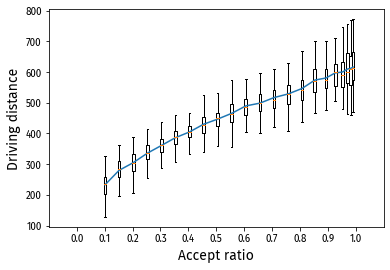

In [177]:
# total_cost_ls
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(dist_ls, positions=accept_ratio_ls, widths=0.01,showfliers=False);
plt.plot(accept_ratio_ls, np.mean(np.array(dist_ls),axis=1))

plt.xticks(np.arange(0,1.1,0.1),[round(x,2) for x in np.arange(0,1.1,0.1)],fontproperties=prop,fontsize=xticks_fontsize)
plt.yticks(fontproperties=prop,fontsize=xticks_fontsize)
plt.xlim(-0.1,1.1)
plt.xlabel('Accept ratio',fontproperties=prop,fontsize=xlabel_fontsize)
plt.ylabel('Driving distance',fontproperties=prop,fontsize=ylabel_fontsize)

array([232.35, 279.57, 304.52, 335.33, 360.59, 386.1 , 404.83, 429.97,
       446.74, 465.59, 489.68, 498.71, 516.87, 528.61, 546.26, 573.82,
       580.6 , 597.11, 600.09, 609.61, 612.2 , 616.12])

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

In [52]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
data.shape = (-1, 1)
d2.shape = (-1, 1)

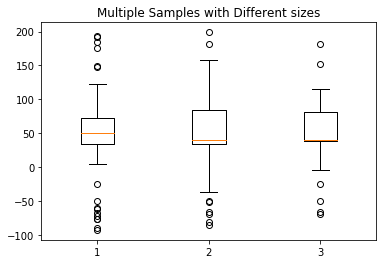

In [53]:
data = [data, d2, d2[::2, 0]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

In [54]:
data

[array([[ 70.03673039],
        [ 74.27508094],
        [ 70.92800107],
        [ 56.67455225],
        [ 97.77853328],
        [ 70.6334846 ],
        [ 24.79157587],
        [ 15.78833509],
        [ 69.76985214],
        [ 71.99566667],
        [ 25.77444303],
        [ 34.15467831],
        [ 96.87611677],
        [ 69.45070978],
        [ 46.63832593],
        [ 70.28126954],
        [ 51.1785874 ],
        [ 92.874137  ],
        [ 73.97692989],
        [ 62.24390337],
        [ 65.15454689],
        [ 39.68076115],
        [ 54.32393949],
        [ 79.98995282],
        [ 72.15447266],
        [ 29.53639811],
        [ 16.09458806],
        [ 20.61255148],
        [ 13.43253868],
        [ 48.06050174],
        [ 34.25218134],
        [ 36.29692901],
        [ 97.29176387],
        [ 11.09436116],
        [ 38.82640891],
        [ 78.30658753],
        [ 97.28972601],
        [ 48.32096053],
        [ 33.64211054],
        [ 56.74190362],
        [  4.79415097],
        [ 38.893

In [18]:
len(total_cost_ls)

11

In [21]:
np.array(total_cost_ls[0:2])

array([list([1454, 1400, 1437, 1458, 1400, 1431, 1405, 1352, 1416, 1415, 1451, 1451, 1476, 1490, 1380, 1459, 1467, 1445, 1475, 1424, 1331, 1389, 1451, 1451, 1391, 1485, 1481, 1365, 1462, 1486, 1497, 1431, 1410, 1454, 1482, 1485, 1477, 1443, 1438, 1419, 1450, 1380, 1405, 1387, 1441, 1410, 1471, 1427, 1412, 1371, 1429, 1423, 1440, 1504, 1410, 1478, 1487, 1442, 1470, 1399, 1448, 1411, 1435, 1402, 1449, 1452, 1396, 1382, 1425, 1393, 1412, 1413, 1462, 1429, 1451, 1413, 1430, 1396, 1495, 1456, 1437, 1394, 1462, 1481, 1383, 1345, 1463, 1365, 1456, 1467, 1446, 1489, 1409, 1457, 1438, 1445, 1419, 1416, 1340, 1480]),
       list([1454, 1400, 1437, 1458, 1400, 1431, 1405, 1352, 1416, 1415, 1451, 1451, 1476, 1490, 1380, 1459, 1467, 1445, 1475, 1424, 1331, 1389, 1451, 1451, 1391, 1485, 1481, 1365, 1462, 1486, 1497, 1431, 1410, 1454, 1482, 1485, 1477, 1443, 1438, 1419, 1450, 1380, 1405, 1387, 1441, 1410, 1471, 1427, 1412, 1371, 1429, 1423, 1440, 1504, 1410, 1478, 1487, 1442, 1470, 1399, 1448, 1411, 

In [24]:
total_cost_ls[1]

[1454,
 1400,
 1437,
 1458,
 1400,
 1431,
 1405,
 1352,
 1416,
 1415,
 1451,
 1451,
 1476,
 1490,
 1380,
 1459,
 1467,
 1445,
 1475,
 1424,
 1331,
 1389,
 1451,
 1451,
 1391,
 1485,
 1481,
 1365,
 1462,
 1486,
 1497,
 1431,
 1410,
 1454,
 1482,
 1485,
 1477,
 1443,
 1438,
 1419,
 1450,
 1380,
 1405,
 1387,
 1441,
 1410,
 1471,
 1427,
 1412,
 1371,
 1429,
 1423,
 1440,
 1504,
 1410,
 1478,
 1487,
 1442,
 1470,
 1399,
 1448,
 1411,
 1435,
 1402,
 1449,
 1452,
 1396,
 1382,
 1425,
 1393,
 1412,
 1413,
 1462,
 1429,
 1451,
 1413,
 1430,
 1396,
 1495,
 1456,
 1437,
 1394,
 1462,
 1481,
 1383,
 1345,
 1463,
 1365,
 1456,
 1467,
 1446,
 1489,
 1409,
 1457,
 1438,
 1445,
 1419,
 1416,
 1340,
 1480,
 1524,
 1423,
 1512,
 1482,
 1490,
 1500,
 1469,
 1447,
 1494,
 1424,
 1478,
 1497,
 1433,
 1463,
 1476,
 1481,
 1428,
 1512,
 1427,
 1500,
 1510,
 1423,
 1446,
 1484,
 1497,
 1508,
 1495,
 1441,
 1458,
 1527,
 1486,
 1473,
 1500,
 1428,
 1500,
 1485,
 1454,
 1477,
 1497,
 1519,
 1503,
 1508,
 1433,

In [5]:
result_summary

{'cost': [{'total': 1668, 'fixed': 1200, 'part': 0, 'fuel': 468},
  {'total': 1879.5, 'fixed': 1200, 'part': 157.5, 'fuel': 522},
  {'total': 1950.75, 'fixed': 1200, 'part': 213.75, 'fuel': 537},
  {'total': 1666, 'fixed': 1200, 'part': 0, 'fuel': 466},
  {'total': 1713.25, 'fixed': 1200, 'part': 26.25, 'fuel': 487},
  {'total': 1674, 'fixed': 1200, 'part': 0, 'fuel': 474},
  {'total': 1627, 'fixed': 1200, 'part': 0, 'fuel': 427},
  {'total': 1694.25, 'fixed': 1200, 'part': 11.25, 'fuel': 483},
  {'total': 1908.0, 'fixed': 1200, 'part': 180.0, 'fuel': 528},
  {'total': 1965.0, 'fixed': 1200, 'part': 225.0, 'fuel': 540},
  {'total': 1560, 'fixed': 1200, 'part': 0, 'fuel': 360},
  {'total': 1813.0, 'fixed': 1200, 'part': 105.0, 'fuel': 508},
  {'total': 1637, 'fixed': 1200, 'part': 0, 'fuel': 437},
  {'total': 1570, 'fixed': 1200, 'part': 0, 'fuel': 370},
  {'total': 1903.25, 'fixed': 1200, 'part': 176.25, 'fuel': 527},
  {'total': 1629, 'fixed': 1200, 'part': 0, 'fuel': 429},
  {'total'